
BFS Solution Path:
Depth: 0
[[2 8 3]
 [1 6 4]
 [7 0 5]]
--------
Depth: 1
[[2 8 3]
 [1 0 4]
 [7 6 5]]
--------
Depth: 2
[[2 0 3]
 [1 8 4]
 [7 6 5]]
--------
Depth: 3
[[0 2 3]
 [1 8 4]
 [7 6 5]]
--------
Depth: 4
[[1 2 3]
 [0 8 4]
 [7 6 5]]
--------
Depth: 5
[[1 2 3]
 [8 0 4]
 [7 6 5]]
--------


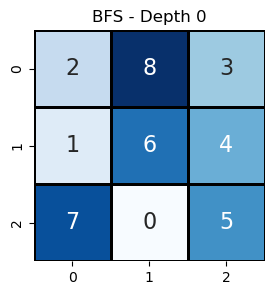

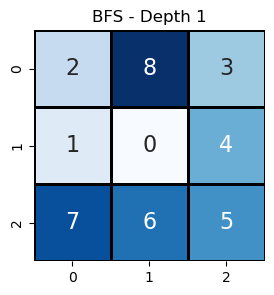

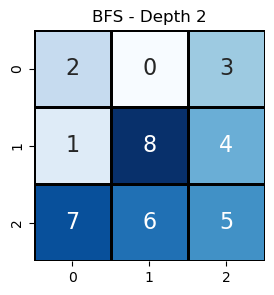

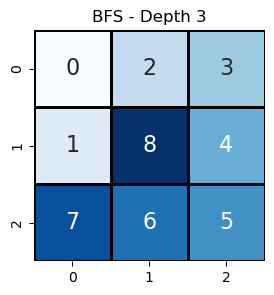

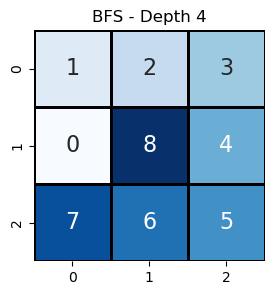

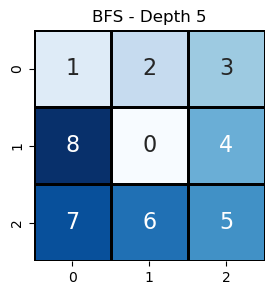


DFS Solution Path:
Depth: 0
[[2 8 3]
 [1 6 4]
 [7 0 5]]
--------
Depth: 1
[[2 8 3]
 [1 6 4]
 [7 5 0]]
--------
Depth: 2
[[2 8 3]
 [1 6 0]
 [7 5 4]]
--------
Depth: 3
[[2 8 3]
 [1 0 6]
 [7 5 4]]
--------
Depth: 4
[[2 8 3]
 [0 1 6]
 [7 5 4]]
--------
Depth: 5
[[0 8 3]
 [2 1 6]
 [7 5 4]]
--------
Depth: 6
[[8 0 3]
 [2 1 6]
 [7 5 4]]
--------
Depth: 7
[[8 1 3]
 [2 0 6]
 [7 5 4]]
--------
Depth: 8
[[8 1 3]
 [2 6 0]
 [7 5 4]]
--------
Depth: 9
[[8 1 3]
 [2 6 4]
 [7 5 0]]
--------
Depth: 10
[[8 1 3]
 [2 6 4]
 [7 0 5]]
--------
Depth: 11
[[8 1 3]
 [2 0 4]
 [7 6 5]]
--------
Depth: 12
[[8 1 3]
 [0 2 4]
 [7 6 5]]
--------
Depth: 13
[[0 1 3]
 [8 2 4]
 [7 6 5]]
--------
Depth: 14
[[1 0 3]
 [8 2 4]
 [7 6 5]]
--------
Depth: 15
[[1 2 3]
 [8 0 4]
 [7 6 5]]
--------


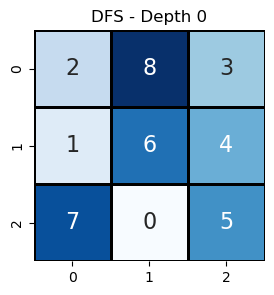

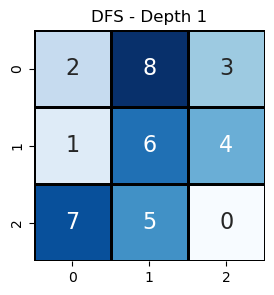

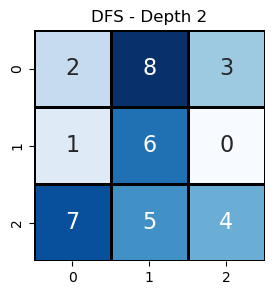

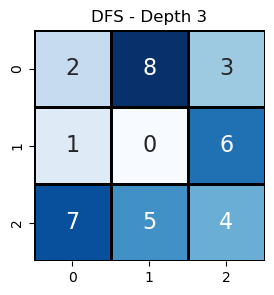

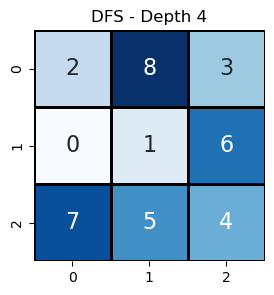

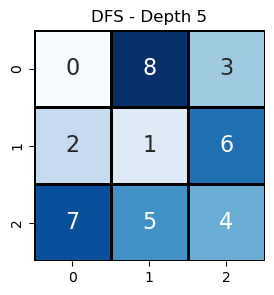

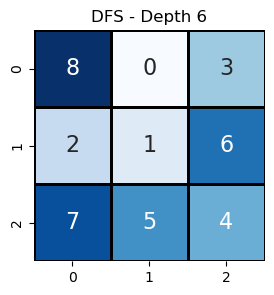

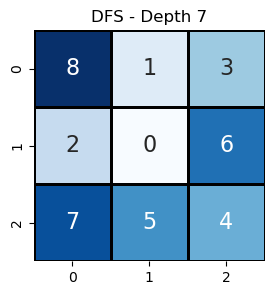

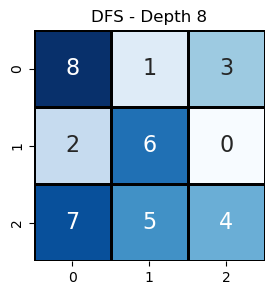

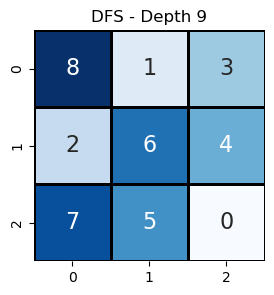

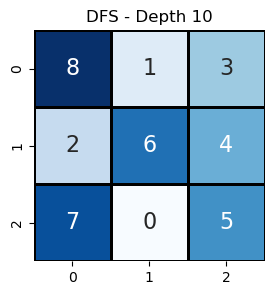

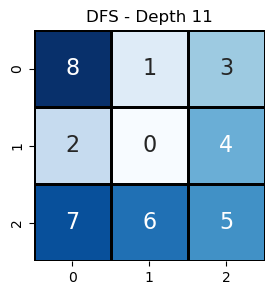

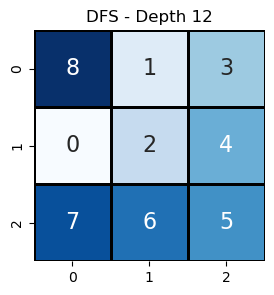

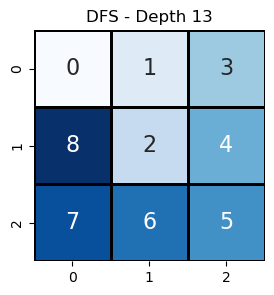

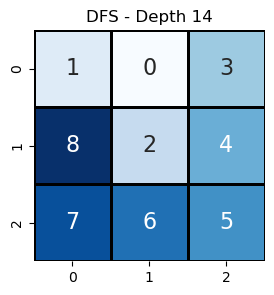

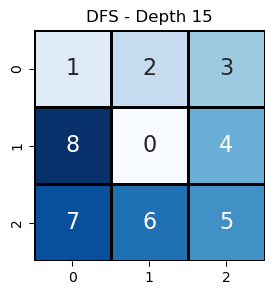

In [1]:
import numpy as np
import copy
from collections import deque
import seaborn as sns
import matplotlib.pyplot as plt

class PuzzleState:
    """
    Represents a single state of the 8-puzzle using NumPy arrays.
    """
    def __init__(self, grid, depth=0, parent=None):
        self.grid = grid
        self.depth = depth
        self.parent = parent

    def __eq__(self, other):
        return np.array_equal(self.grid, other.grid)

    def __hash__(self):
        return hash(self.grid.tobytes())  # hashable representation

    def find_blank(self):
        """Locate the blank (0) position in the grid."""
        x, y = np.where(self.grid == 0)
        return int(x[0]), int(y[0])

    def generate_successors(self):
        """Generate all possible moves from the current state."""
        successors = []
        x, y = self.find_blank()
        moves = [(-1,0), (1,0), (0,-1), (0,1)]  # up, down, left, right

        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 3 and 0 <= ny < 3:
                new_grid = self.grid.copy()
                new_grid[x, y], new_grid[nx, ny] = new_grid[nx, ny], new_grid[x, y]
                successors.append(PuzzleState(new_grid, self.depth+1, self))
        return successors


class PuzzleSolver:
    """
    Solver for the 8-puzzle using BFS and DFS with NumPy arrays.
    """
    def __init__(self, initial_state, goal_state):
        self.initial_state = PuzzleState(initial_state)
        self.goal_state = PuzzleState(goal_state)

    def is_goal(self, state):
        return state == self.goal_state

    def reconstruct_path(self, state):
        """Reconstruct path from initial to goal by following parents."""
        path = []
        while state:
            path.append(state)
            state = state.parent
        return list(reversed(path))

    def solve_bfs(self):
        """Solve puzzle using Breadth-First Search."""
        frontier = deque([self.initial_state])
        visited = set([self.initial_state])

        while frontier:
            current = frontier.popleft()
            if self.is_goal(current):
                return self.reconstruct_path(current)

            for neighbor in current.generate_successors():
                if neighbor not in visited:
                    visited.add(neighbor)
                    frontier.append(neighbor)
        return None

    def solve_dfs(self, max_depth=50):
        """Solve puzzle using Depth-First Search (with depth limit)."""
        stack = [self.initial_state]
        visited = set([self.initial_state])

        while stack:
            current = stack.pop()
            if self.is_goal(current):
                return self.reconstruct_path(current)

            if current.depth < max_depth:
                for neighbor in current.generate_successors():
                    if neighbor not in visited:
                        visited.add(neighbor)
                        stack.append(neighbor)
        return None

    # ---------- Output Functions ----------

    def print_path_text(self, path, algo_name):
        """Prints the solution path in text format with depth info."""
        print(f"\n{algo_name} Solution Path:")
        for state in path:
            print(f"Depth: {state.depth}")
            print(state.grid)
            print("--------")

    def plot_path_seaborn(self, path, algo_name):
        """Plots each state in the path using seaborn heatmaps."""
        for state in path:
            plt.figure(figsize=(3,3))
            sns.heatmap(state.grid, annot=True, cbar=False, square=True,
                        linewidths=1, linecolor="black", cmap="Blues",
                        fmt="d", annot_kws={"size":16})
            plt.title(f"{algo_name} - Depth {state.depth}")
            plt.show()


# ---------------- Example Usage ----------------
if __name__ == "__main__":
    initial_state = np.array([[2, 8, 3],
                              [1, 6, 4],
                              [7, 0, 5]])

    goal_state = np.array([[1, 2, 3],
                           [8, 0, 4],
                           [7, 6, 5]])

    solver = PuzzleSolver(initial_state, goal_state)

    # Solve with BFS
    bfs_path = solver.solve_bfs()
    if bfs_path:
        solver.print_path_text(bfs_path, "BFS")
        solver.plot_path_seaborn(bfs_path, "BFS")

    # Solve with DFS
    dfs_path = solver.solve_dfs(max_depth=30)
    if dfs_path:
        solver.print_path_text(dfs_path, "DFS")
        solver.plot_path_seaborn(dfs_path, "DFS")
